In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 10

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
51/64 [======================>.......] - ETA: 0s - loss: 2.2920 - accuracy: 0.1919
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 1s 9ms/step - loss: 2.2724 - accuracy: 0.1922 - val_loss: 2.1307 - val_accuracy: 0.2110
Epoch 2/1000
59/64 [==========================>...] - ETA: 0s - loss: 2.1310 - accuracy: 0.2076
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 2.1268 - accuracy: 0.2096 - val_loss: 1.9985 - val_accuracy: 0.2251
Epoch 3/1000
56/64 [=========================>....] - ETA: 0s - loss: 2.0230 - accuracy: 0.2480
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 5ms/step - loss: 2.0144 - accuracy: 0.2516 - val_loss: 1.8603 - val_accuracy: 0.3585
Epoch 4/1000
61/64 [===========================>..] - ETA: 0s - loss: 1.8998 - accuracy: 0.3076
E

53/64 [=======================>......] - ETA: 0s - loss: 1.1044 - accuracy: 0.6023
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 3ms/step - loss: 1.1100 - accuracy: 0.6015 - val_loss: 0.6699 - val_accuracy: 0.8607
Epoch 29/1000
56/64 [=========================>....] - ETA: 0s - loss: 1.1062 - accuracy: 0.6038
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 1.1064 - accuracy: 0.6065 - val_loss: 0.6557 - val_accuracy: 0.8610
Epoch 30/1000
47/64 [=====================>........] - ETA: 0s - loss: 1.0884 - accuracy: 0.6062
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 1.0885 - accuracy: 0.6084 - val_loss: 0.6504 - val_accuracy: 0.8577
Epoch 31/1000
47/64 [=====================>........] - ETA: 0s - loss: 1.0906 - accuracy: 0.6157
Epoch 31

42/64 [==================>...........] - ETA: 0s - loss: 0.9815 - accuracy: 0.6520
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.9864 - accuracy: 0.6478 - val_loss: 0.4990 - val_accuracy: 0.9180
Epoch 56/1000
62/64 [============================>.] - ETA: 0s - loss: 0.9868 - accuracy: 0.6418
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.9874 - accuracy: 0.6428 - val_loss: 0.4849 - val_accuracy: 0.9183
Epoch 57/1000
53/64 [=======================>......] - ETA: 0s - loss: 0.9803 - accuracy: 0.6478
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 3ms/step - loss: 0.9853 - accuracy: 0.6449 - val_loss: 0.4966 - val_accuracy: 0.9102
Epoch 58/1000
59/64 [==========================>...] - ETA: 0s - loss: 0.9747 - accuracy: 0.6494
Epoch 58

48/64 [=====================>........] - ETA: 0s - loss: 0.9446 - accuracy: 0.6582
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.9466 - accuracy: 0.6571 - val_loss: 0.4429 - val_accuracy: 0.9246
Epoch 83/1000
56/64 [=========================>....] - ETA: 0s - loss: 0.9323 - accuracy: 0.6646
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 5ms/step - loss: 0.9337 - accuracy: 0.6646 - val_loss: 0.4346 - val_accuracy: 0.9224
Epoch 84/1000
44/64 [===================>..........] - ETA: 0s - loss: 0.9464 - accuracy: 0.6625
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.9409 - accuracy: 0.6672 - val_loss: 0.4401 - val_accuracy: 0.9228
Epoch 85/1000
64/64 [==============================] - ETA: 0s - loss: 0.9291 - accuracy: 0.6663
Epoch 85

53/64 [=======================>......] - ETA: 0s - loss: 0.8968 - accuracy: 0.6846
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 3ms/step - loss: 0.8976 - accuracy: 0.6819 - val_loss: 0.4137 - val_accuracy: 0.9294
Epoch 110/1000
53/64 [=======================>......] - ETA: 0s - loss: 0.9184 - accuracy: 0.6767
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.9173 - accuracy: 0.6744 - val_loss: 0.4061 - val_accuracy: 0.9353
Epoch 111/1000
61/64 [===========================>..] - ETA: 0s - loss: 0.9037 - accuracy: 0.6738
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 3ms/step - loss: 0.9101 - accuracy: 0.6725 - val_loss: 0.4072 - val_accuracy: 0.9316
Epoch 112/1000
57/64 [=========================>....] - ETA: 0s - loss: 0.9100 - accuracy: 0.6752
Ep

Epoch 136/1000
64/64 [==============================] - ETA: 0s - loss: 0.8576 - accuracy: 0.6946
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.8576 - accuracy: 0.6946 - val_loss: 0.3925 - val_accuracy: 0.9368
Epoch 137/1000
57/64 [=========================>....] - ETA: 0s - loss: 0.8841 - accuracy: 0.6800
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.8870 - accuracy: 0.6824 - val_loss: 0.3872 - val_accuracy: 0.9372
Epoch 138/1000
51/64 [======================>.......] - ETA: 0s - loss: 0.8794 - accuracy: 0.6893
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.8858 - accuracy: 0.6865 - val_loss: 0.4049 - val_accuracy: 0.9339
Epoch 139/1000
63/64 [============================>.] - ETA: 0s - loss: 0.8918 - accu

Epoch 163/1000
48/64 [=====================>........] - ETA: 0s - loss: 0.8600 - accuracy: 0.6847
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.8668 - accuracy: 0.6837 - val_loss: 0.3958 - val_accuracy: 0.9401
Epoch 164/1000
63/64 [============================>.] - ETA: 0s - loss: 0.8721 - accuracy: 0.6859
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 0.8694 - accuracy: 0.6870 - val_loss: 0.3945 - val_accuracy: 0.9346
Epoch 165/1000
53/64 [=======================>......] - ETA: 0s - loss: 0.8635 - accuracy: 0.6938
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
64/64 [==============================] - 0s 3ms/step - loss: 0.8630 - accuracy: 0.6932 - val_loss: 0.3885 - val_accuracy: 0.9368
Epoch 166/1000
56/64 [=========================>....] - ETA: 0s - loss: 0.8418 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

22/22 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.9364


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 123ms/step
[1.4762822e-02 5.8191973e-01 4.0251550e-01 3.5777934e-09 1.1798592e-07
 7.9944206e-04 1.5409132e-09 4.9764459e-12 3.2162447e-14 2.4101457e-06]
1


# 混同行列

85/85 [==============================] - 0s 1ms/step


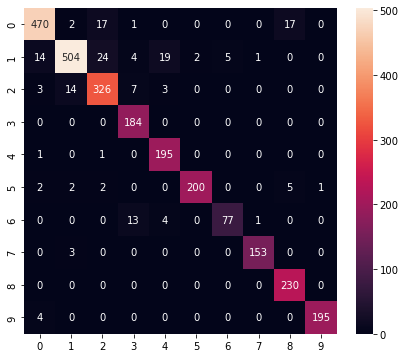

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       507
           1       0.96      0.88      0.92       573
           2       0.88      0.92      0.90       353
           3       0.88      1.00      0.94       184
           4       0.88      0.99      0.93       197
           5       0.99      0.94      0.97       212
           6       0.94      0.81      0.87        95
           7       0.99      0.98      0.98       156
           8       0.91      1.00      0.95       230
           9       0.99      0.98      0.99       199

    accuracy                           0.94      2706
   macro avg       0.94      0.94      0.94      2706
weighted avg       0.94      0.94      0.94      2706



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp_fkc79_m\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp_fkc79_m\assets


6808

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 8.32 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.47628263e-02 5.81919968e-01 4.02515292e-01 3.57778096e-09
 1.17985735e-07 7.99441244e-04 1.54091084e-09 4.97643853e-12
 3.21624610e-14 2.41014413e-06]
1
